In [1]:
%load_ext autoreload
%autoreload

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

sys.path.append('../')
from LinearModels import display_plot_logreg

#### Regularization parameter

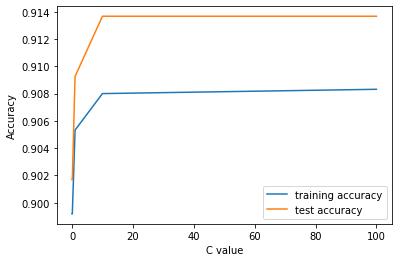

In [2]:
display_plot_logreg('../../../dumps/various_sizes/8K.csv',0.20,0.01,100)

The curves we get are perfectly linear starting from C=10 and gives better results than the default value of 1 for both accuracies. We may therefore favor a C value equal to 10.

### Final choice

In [3]:
gt = pd.read_csv('../../../dumps/various_sizes/8K.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)
scaler = Normalizer()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)

In [8]:
logreg = LogisticRegression(C=10, max_iter=100,random_state=0)
logreg.fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

Training set score: 0.908
Test set score: 0.914
